In [1]:
from scipy import optimize
import math
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

Предпирятие производит продукцию. Выпуск задан функцией $$ F(K,S,L) = K^\alpha * S^\beta * L^{1-\alpha-\beta}$$ 
$K$ — стоимость оборудования, тыс. руб. \
$S$ — инвестиции, тыс. руб. \
$L$ — затраты труда, в чел.-час. \
$\alpha$ = 0.3 \
$\beta$ = 0.4 \
Обслуживание оборудования обходится в $\textbf{a}$% от его стоимости, выплаты
по кредиту - $\textbf{b}$%, чел.-час. стоит $\textbf{d}$ руб. Цена 1 ед. продукции - $\textbf{P}$ руб. \
Как распорядиться суммой в 1 млн. руб., чтобы добиться максимальной
выручки? Сколько привлечь инвестиций, на какую сумму закупить оборудования, сколько потребуется чел.-час?

In [2]:
alpha = 0.3
beta = 0.4
a = 6
b = 8
d = 100
P = 150

Выручка составит, тыс. руб $$ 150F(K,S,L) = 150K^{0.3}S^{0.4}L^{0.3} $$ 

Затраты равны, тыс. руб $$0.06K + 0.08S + 0.1L$$ 
$0.06K$ — обслуживание оборудования \
$0.08S$ — проценты по кредиту \
$0.1L$ — заработная плата (100руб = 0.1тыс.руб)

Получаем задачу $$
\begin{cases} 
150K^{0.3}S^{0.4}L^{0.3} \rightarrow max \\
0.06K + 0.08S + 0.1L = 1000 \\
K\ge0 \\
S\ge0 \\
L\ge0 \\
\end{cases} $$

### Mетод множителей Лагранжа

Функция Лагранжа $$150K^{0.3}S^{0.4}L^{0.3} - \lambda(0.06K + 0.08S + 0.1L - 1000)\longrightarrow max \\ \text{где } \lambda \text { — множитель Лагранжа} $$ 

Находим частные производные и, приравнивая их к нулю, получаем систему уравнений
\begin{cases}
45K^{-0.7}S^{0.4}L^{0.3} - 0.06\lambda = 0\\
60K^{0.3}S^{-0.6}L^{0.3} - 0.08\lambda = 0\\
45K^{0.3}S^{0.4}L^{-0.7} - 0.1\lambda = 0 \\
0.06K + 0.08S + 0.1L = 1000 \\
\end{cases} 

После уножения соответствующих столбцов на 100/6, 100/8 и 10 получаем
\begin{cases}
750K^{-0.7}S^{0.4}L^{0.3} - \lambda = 0 \\
750K^{0.3}S^{-0.6}L^{0.3} - \lambda = 0 \\
450K^{0.3}S^{0.4}L^{-0.7} - \lambda = 0 \\
0.06K + 0.08S + 0.1L = 1000 \\
\end{cases} 

Из 1-го и 2-го уравнения $K^{-0.7}S^{0.4}L^{0.3} = K^{0.3}S^{-0.6}L^{0.3} \text{, откуда} \text{ } S = K $

Из 2-го и 3-го уравнения $ K^{0.3}S^{-0.6}L^{0.3} = 0.6K^{0.3}S^{0.4}L^{-0.7} \text{, откуда} \text{ } L = 0.6S $

Подставив в 4-е уравнение получаем $ 0.06S + 0.08S + 0.1(0.6S) = 1000 \text{, откуда} \text{ } S = 5000 \text{, тогда K = 5000, L = 3000} $

####   Ответ: Следует приобрести оборудование на 5 млн. руб., привлечь инфестиций 5 млн. руб. и затратить 3 тыс. чел.-час.

In [3]:
K = 5000
S = 5000
L = 3000

Проверка результата. Вычислим затраты, тыс.руб, $0.06K + 0.08S + 0.1L = 1000 $

In [4]:
0.06*S + 0.08*K + 0.1*L           # 1000 тыс.руб = 1млн руб

1000.0

In [5]:
round(150*pow(K,0.3)*pow(S,0.4)*pow(L,0.3), 0)

643438.0

Посчитаем выручку, тыс.руб, $150K^{0.3}S^{0.4}L^{0.3} $:

In [6]:
round(150*pow(K,0.3)*pow(S,0.4)*pow(L,0.3)/1000, 0)

643.0

Функция минимизации $$-150K^{0.3}S^{0.4}L^{0.3} - 0.06K - 0.08S - 0.1L + 1000\longrightarrow min $$ 

Функция Лагранжа $$150K^{0.3}S^{0.4}L^{0.3} - \lambda(0.06K + 0.08S + 0.1L - 1000)\longrightarrow max \\ \text{где } \lambda \text { — множитель Лагранжа} $$ 

Функция Лагранжа $$150K^{0.3}S^{0.4}L^{0.3} + 0.06K + 0.08S + 0.1L - 1000\longrightarrow max $$ 

## генетический алгоритм

In [37]:
def f_3(x):                # x[0]-K     x[1]-S     x[2]-L
    pen = 0
    fun = 150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)
    if (0.06*x[0] + 0.08*x[1] + 0.1*x[2]-1000) > 0:
        pen = 100000 + 300000*(1000 - (0.06*x[0] + 0.08*x[1] + 0.1*x[2]))
    return (fun + pen)

algorithm_param = {'max_num_iteration': 7000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[0,100000]]*3)

model=ga(lambda x: -f_3(x), dimension=3, 
         variable_type='real', 
         variable_boundaries=varbound, 
         algorithm_parameters=algorithm_param)

model.run()

 The best solution found:                                                                           
 [4299.2289832  5206.01800804 3255.64939662]

 Objective function:
 -740438.9232176119


In [40]:
def f_3(x):                # x[0]-K     x[1]-S     x[2]-L
    
    pen = 0
    fun = 150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)
    if (0.06*x[0] + 0.08*x[1] + 0.1*x[2]-1000) > 0:
        pen = 100000 + 300000*(1000 - (0.06*x[0] + 0.08*x[1] + 0.1*x[2]))
    return (fun + pen)

algorithm_param = {'max_num_iteration': 100000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[0,10000]]*3)

model=ga(lambda x: -f_3(x), dimension=3, 
         variable_type='real', 
         variable_boundaries=varbound, 
         algorithm_parameters=algorithm_param)

model.run()

 The best solution found:                                                                           
 [5227.3986873  5059.89338015 2815.65877567]

 Objective function:
 -742466.054052994


In [11]:
from scipy.optimize import minimize
import numpy as np
f = lambda x: np.sin(x)  # function to be MAXIMIZED
res = minimize(lambda x: -f(x), 0)
print('Maximum {} attained at {}'.format(-res.fun, res.x))

Maximum 1.0 attained at [1.57079632]


 The best solution found:                                                                           
 [7726.5028952  3458.46106789 2597.33059339]

 Objective function:
 -705859.6057179113


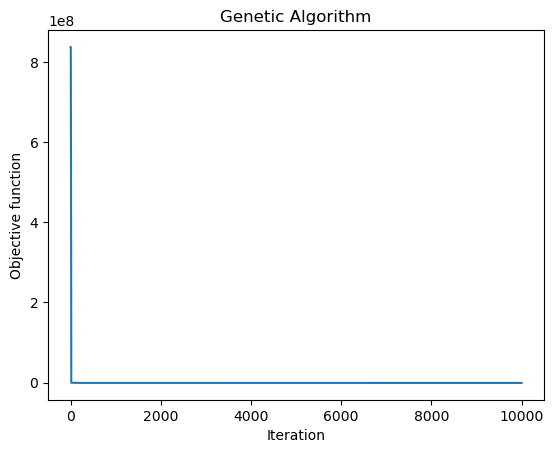

In [41]:
def f_3(x):                # x[0]-K     x[1]-S     x[2]-L
    
    pen = 0
    fun = 150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)
    if (0.06*x[0] + 0.08*x[1] + 0.1*x[2]-1000) > 0:
        pen = 100000 + 300000*(1000 - (0.06*x[0] + 0.08*x[1] + 0.1*x[2]))
    return (fun + pen)

algorithm_param = {'max_num_iteration': 10000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[0,100000]]*3)

model=ga(lambda x: -f_3(x), dimension=3, 
         variable_type='real', 
         variable_boundaries=varbound, 
         algorithm_parameters=algorithm_param)

model.run()

 The best solution found:                                                                           
 [5105.39209944 5287.12434517 2707.11343403]

 Objective function:
 -740561.8640548795


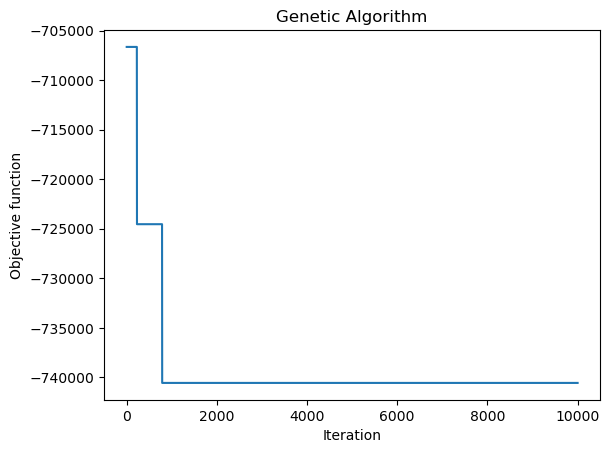

In [42]:
def f_3(x):                # x[0]-K     x[1]-S     x[2]-L
    
    pen = 0
    fun = 150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)
    if (0.06*x[0] + 0.08*x[1] + 0.1*x[2]-1000) > 0:
        pen = 100000 + 300000*(1000 - (0.06*x[0] + 0.08*x[1] + 0.1*x[2]))
    return (fun + pen)

algorithm_param = {'max_num_iteration': 10000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[3000,7000], [3000,7000], [1000,5000]])

model=ga(lambda x: -f_3(x), dimension=3, 
         variable_type='real', 
         variable_boundaries=varbound, 
         algorithm_parameters=algorithm_param)

model.run()

 The best solution found:                                                                           
 [4791.25804197 5198.24342116 2966.65174665]

 Objective function:
 -743016.659989501


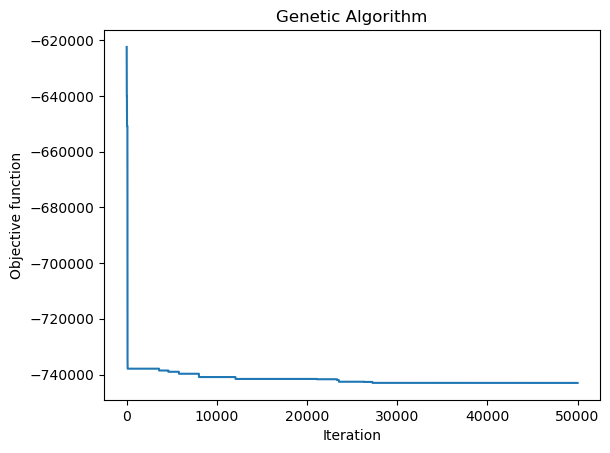

In [43]:
def f_3(x):                # x[0]-K     x[1]-S     x[2]-L
    
    pen = 0
    fun = 150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)
    if (0.06*x[0] + 0.08*x[1] + 0.1*x[2]-1000) > 0:
        pen = 100000 + 300000*(1000 - (0.06*x[0] + 0.08*x[1] + 0.1*x[2]))
    return (fun + pen)

algorithm_param = {'max_num_iteration': 50000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[3000,7000], [3000,7000], [1000,5000]])

model=ga(lambda x: -f_3(x), dimension=3, 
         variable_type='real', 
         variable_boundaries=varbound, 
         algorithm_parameters=algorithm_param)

model.run()

In [44]:
def f_3(x):                # x[0]-K     x[1]-S     x[2]-L
    
    pen = 0
    fun = 150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)
    if (0.06*x[0] + 0.08*x[1] + 0.1*x[2]-1000) > 0:
        pen = 100000 + 300000*(1000 - (0.06*x[0] + 0.08*x[1] + 0.1*x[2]))
    return (fun + pen)

algorithm_param = {'max_num_iteration': 100000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[3000,7000], [3000,7000], [1000,5000]])

model=ga(lambda x: -f_3(x), dimension=3, 
         variable_type='real', 
         variable_boundaries=varbound, 
         algorithm_parameters=algorithm_param)

model.run()

 The best solution found:                                                                           
 [4941.70212989 4860.34081013 3146.70609885]

 Objective function:
 -743098.161112007
